# 1. Xác định mục tiêu bài toán
## Mục tiêu của bài toán là dự đoán giá nhà (price) dựa trên các đặc trưng (features) trong tập dữ liệu như số phòng ngủ (bedrooms), số phòng tắm (bathrooms), diện tích (sqft_living, sqft_lot), số tầng (floors), năm xây dựng (yr_built), v.v. Đây là một bài toán hồi quy (regression) vì biến mục tiêu (price) là một giá trị liên tục. Tuy nhiên, để áp dụng các mô hình phân loại như Logistic Regression và Naive Bayes, ta có thể chuyển bài toán thành phân loại bằng cách phân loại giá nhà thành các nhóm (ví dụ: giá thấp, trung bình, cao).

## Bài toán phân loại: Phân loại giá nhà cao, trung bình, thấp.

Tập dữ liệu chứa thông tin về các căn nhà được bán ở khu vực bang Washington, Mỹ, với các cột sau:

1. id: Mã định danh duy nhất cho mỗi căn nhà.

2. date: Ngày bán nhà (định dạng datetime).

3. price: Giá bán nhà (biến mục tiêu, đơn vị USD).

4. bedrooms: Số phòng ngủ.

5. bathrooms: Số phòng tắm.

6. sqft_living: Diện tích sinh hoạt (feet vuông).

7. sqft_lot: Diện tích lô đất (feet vuông).

8. floors: Số tầng.

9. waterfront: Có mặt nước hay không (0: không, 1: có).

10. view: Chất lượng tầm nhìn (0-4).

11. condition: Tình trạng nhà (1-5).

12. grade: Điểm chất lượng xây dựng (1-13).

13. sqft_above: Diện tích trên mặt đất (feet vuông).

14. sqft_basement: Diện tích tầng hầm (feet vuông).

15. yr_built: Năm xây dựng.

16. yr_renovated: Năm cải tạo (0 nếu chưa cải tạo).

17. zipcode: Mã bưu điện.

18. lat: Vĩ độ.

19. long: Kinh độ.

20. sqft_living15: Diện tích sinh hoạt trung bình của 15 ngôi nhà lân cận (feet vuông).

21. sqft_lot15: Diện tích lô đất trung bình của 15 lô đất lân cận (feet vuông).

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix

## 2. Chuẩn bị và mô tả dữ liệu

In [2]:
data = pd.read_csv('kc_house_data.csv')
data = data[data['price'] > 0]  # Loại bỏ giá 0
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Bộ dữ liệu gồm 21 cột, 31613 dòng và không có dữ liệu bị thiếu. Có 5 cột thuộc kiểu dữ liệu float, 15 cột kiểu int, và 1 cột thuộc kiểu object.

Giá nhà trung bình là 540088.2 USD, giá thấp nhất là 75000 USD, và nhà có giá cao nhất là 7700000 USD.

Trung vị (50%): Trung vị là 450,000 USD, thấp hơn trung bình khoảng 90,000 USD. Điều này cho thấy phân phối giá nhà có thể lệch phải (right-skewed), tức là có một số ít căn nhà có giá rất cao làm kéo giá trị trung bình lên.

Độ lệch chuẩn (std): Độ lệch chuẩn là 367,127.2 USD, khá lớn so với giá trị trung bình, cho thấy giá nhà có sự biến động mạnh. Điều này phản ánh sự đa dạng trong giá nhà, từ những căn nhà giá rẻ đến những căn nhà rất đắt.

In [3]:
# Tiền xử lý dữ liệu
# Loại bỏ các cột không cần thiết (id, date, zipcode, lat, long không cần thiết cho phân tích tương quan)
data = data.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'])

# Loại bỏ các dòng trùng lặp
data = data.drop_duplicates()

# Loại bỏ các dòng có price = 0 (nếu có)
data = data[data['price'] > 0]

# Xử lý yr_renovated: thay 0 bằng yr_built nếu chưa cải tạo
data['yr_renovated'] = data.apply(lambda row: row['yr_built'] if row['yr_renovated'] == 0 else row['yr_renovated'], axis=1)


Hệ số tương quan với price (sắp xếp giảm dần):
price            1.000000
sqft_living      0.702041
grade            0.667553
sqft_above       0.605576
sqft_living15    0.585376
bathrooms        0.525163
view             0.397405
sqft_basement    0.323829
bedrooms         0.308389
waterfront       0.266370
floors           0.256921
yr_renovated     0.105844
sqft_lot         0.089646
sqft_lot15       0.082427
yr_built         0.054098
condition        0.036331
Name: price, dtype: float64


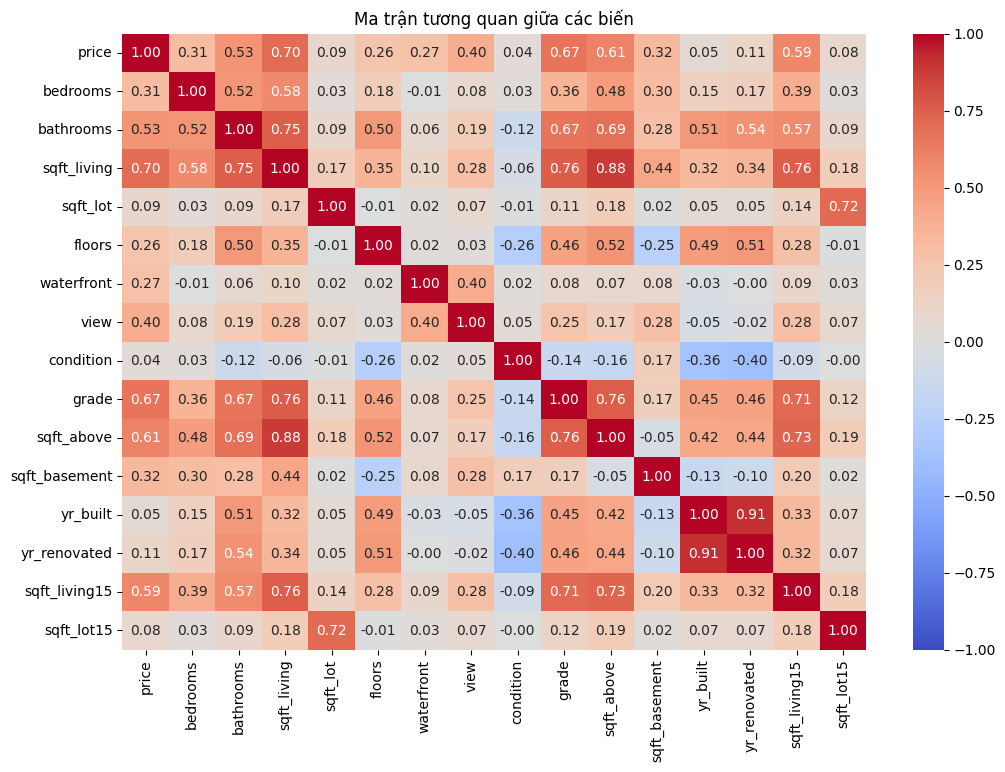

In [4]:
# 2. Tính ma trận tương quan
correlation_matrix = data.corr(method='pearson')

# 3. Hiển thị tương quan với price
print("\nHệ số tương quan với price (sắp xếp giảm dần):")
print(correlation_matrix['price'].sort_values(ascending=False))

# 4. Trực quan hóa ma trận tương quan bằng heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các biến')
plt.show()

***Nhận xét biểu đồ***

Các biến có tương quan mạnh với price:

sqft_living (0.70): Diện tích sinh hoạt có tương quan dương mạnh với giá nhà. Điều này hợp lý vì nhà có diện tích lớn thường có giá cao hơn.

grade (0.67): Chất lượng xây dựng (grade) cũng có tương quan mạnh với giá nhà. Nhà có chất lượng xây dựng cao (grade cao) thường đắt hơn.

sqft_above (0.61): Diện tích trên mặt đất có tương quan mạnh, vì phần lớn diện tích sinh hoạt nằm ở trên mặt đất.

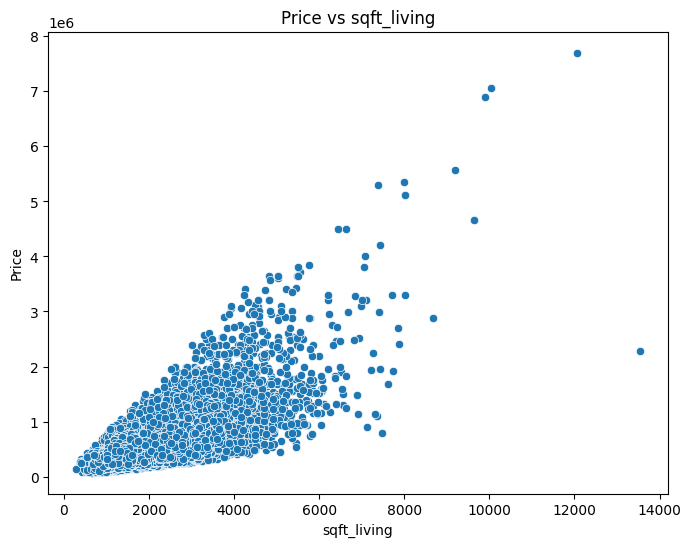

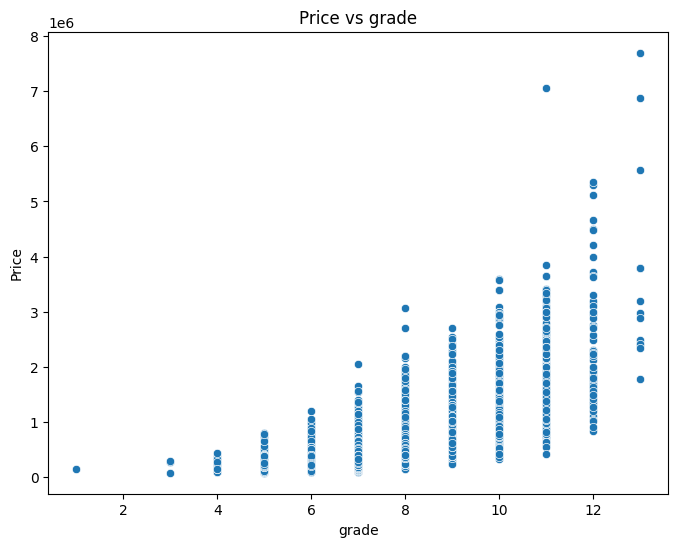

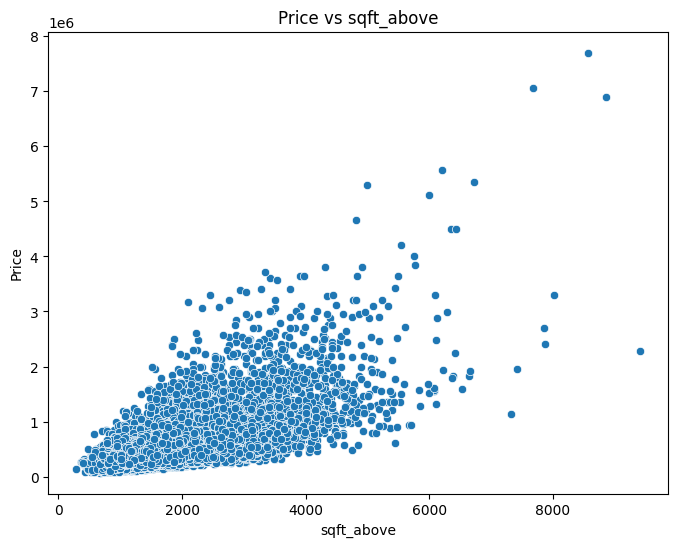

In [5]:
# 3. Trực quan hóa mối quan hệ giữa price và các biến số
numerical_features = ['sqft_living', 'grade', 'sqft_above']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['price'])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

### Nhận xét: 

 ***1.Nhận xét về mối quan hệ giữa price và sqft_living***

**Xu hướng tổng quát:**

Có một xu hướng tăng tuyến tính giữa sqft_living và price: Khi diện tích sinh hoạt (sqft_living) tăng, giá nhà (price) cũng có xu hướng tăng. Điều này phù hợp với thực tế, vì nhà có diện tích lớn hơn thường có giá cao hơn do cung cấp không gian sống rộng rãi hơn.

Tuy nhiên, mối quan hệ không hoàn toàn tuyến tính hoàn hảo, vì có nhiều điểm dữ liệu phân tán khá rộng, đặc biệt ở các giá trị sqft_living lớn.

**Biến động giá nhà:**

Ở cùng một mức diện tích (sqft_living), giá nhà có sự biến động lớn. Ví dụ:
Với sqft_living khoảng 2000 feet vuông, giá nhà dao động từ dưới 1 triệu USD đến khoảng 2.5 triệu USD.
Với sqft_living khoảng 4000 feet vuông, giá nhà dao động từ khoảng 1 triệu USD đến gần 4 triệu USD.

Sự biến động này cho thấy ngoài diện tích sinh hoạt, còn có các yếu tố khác ảnh hưởng đến giá nhà, như vị trí, chất lượng xây dựng (grade), tầm nhìn (view), mặt nước (waterfront), hoặc tình trạng nhà (condition).

**Ý nghĩa thực tế:**

Diện tích là yếu tố quan trọng: sqft_living có ảnh hưởng rõ rệt đến giá nhà, và đây là một trong những yếu tố quan trọng nhất khi định giá bất động sản. Điều này phù hợp với hệ số tương quan cao (0.70) đã tính toán trước đó.

***2. Nhận xét về mối quan hệ giữa price và grade***

**Xu hướng tổng quát:**

Có một xu hướng tăng giữa grade và price: Khi chất lượng xây dựng (grade) tăng, giá nhà (price) cũng có xu hướng tăng. Điều này hợp lý vì nhà có chất lượng xây dựng cao hơn (grade cao) thường được xây dựng với vật liệu tốt hơn, thiết kế đẹp hơn, và có giá trị cao hơn.

Mối quan hệ này không hoàn toàn tuyến tính, nhưng có thể thấy rõ rằng các căn nhà có grade cao (từ 9 trở lên) thường có giá cao hơn đáng kể so với các căn nhà có grade thấp (dưới 6).

**Biến động giá nhà:**

Ở cùng một mức grade, giá nhà có sự biến động lớn. Ví dụ:
Với grade = 7, giá nhà dao động từ khoảng 0.5 triệu USD đến gần 2 triệu USD.
Với grade = 10, giá nhà dao động từ khoảng 1 triệu USD đến gần 5 triệu USD.

Sự biến động này cho thấy ngoài chất lượng xây dựng, còn có các yếu tố khác ảnh hưởng đến giá nhà, như diện tích (sqft_living), vị trí, tầm nhìn (view), hoặc mặt nước (waterfront).

**Ý nghĩa thực tế:**

Chất lượng xây dựng là yếu tố quan trọng: grade có ảnh hưởng rõ rệt đến giá nhà, và đây là một trong những yếu tố quan trọng khi định giá bất động sản. Điều này phù hợp với hệ số tương quan cao (0.67) đã tính toán trước đó.

***3. Nhận xét về mối quan hệ giữa price và sqft_above***

**Xu hướng tổng quát:**

Có một xu hướng tăng tuyến tính giữa sqft_above và price: Khi diện tích trên mặt đất (sqft_above) tăng, giá nhà (price) cũng có xu hướng tăng. Điều này hợp lý vì diện tích trên mặt đất thường chiếm phần lớn diện tích sinh hoạt của căn nhà, và nhà có diện tích lớn hơn thường có giá cao hơn.

Mối quan hệ này tương tự như mối quan hệ giữa price và sqft_living (đã phân tích trước đó), vì sqft_above là một phần của sqft_living (diện tích sinh hoạt = diện tích trên mặt đất + diện tích tầng hầm).

**Biến động giá nhà:**

Ở cùng một mức sqft_above, giá nhà có sự biến động lớn. Ví dụ:
Với sqft_above khoảng 2000 feet vuông, giá nhà dao động từ dưới 1 triệu USD đến khoảng 2.5 triệu USD.
Với sqft_above khoảng 4000 feet vuông, giá nhà dao động từ khoảng 1 triệu USD đến gần 4 triệu USD.

Sự biến động này cho thấy ngoài diện tích trên mặt đất, còn có các yếu tố khác ảnh hưởng đến giá nhà, như chất lượng xây dựng (grade), tầm nhìn (view), mặt nước (waterfront), hoặc vị trí.

**Ý nghĩa thực tế**

Diện tích trên mặt đất là yếu tố quan trọng: sqft_above có ảnh hưởng rõ rệt đến giá nhà, và đây là một trong những yếu tố quan trọng khi định giá bất động sản. Tuy nhiên, nó kém quan trọng hơn một chút so với sqft_living, vì không bao gồm diện tích tầng hầm

### Áp dụng vào mô hình

In [6]:
# Chọn các đặc trưng
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
X = data[features]
# Tạo biến phân loại dựa trên giá
price_threshold_low = data['price'].quantile(0.33)  # Ngưỡng cho 'low'
price_threshold_high = data['price'].quantile(0.66)  # Ngưỡng cho 'high'
y_classification = pd.cut(data['price'], 
                          bins=[0, price_threshold_low, price_threshold_high, float('inf')], 
                          labels=['low', 'medium', 'high'], 
                          include_lowest=True)


# Biến mục tiêu 
y_regression = data['price']

In [7]:
# Chia tập dữ liệu
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

#### Mô hình phân loại

In [8]:
# Phân loại
results_classification = {}

# SVC
svc = SVC(kernel='rbf')
svc.fit(X_train_clf, y_train_clf)
y_pred_svc = svc.predict(X_test_clf)
results_classification['SVC'] = {
    'Accuracy': accuracy_score(y_test_clf, y_pred_svc),
    'F1': f1_score(y_test_clf, y_pred_svc, average='weighted')
}

# KNN Classification
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_clf, y_train_clf)
y_pred_knn_clf = knn_clf.predict(X_test_clf)
results_classification['KNN Classification'] = {
    'Accuracy': accuracy_score(y_test_clf, y_pred_knn_clf),
    'F1': f1_score(y_test_clf, y_pred_knn_clf, average='weighted')
}

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf)
results_classification['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test_clf, y_pred_log),
    'F1': f1_score(y_test_clf, y_pred_log, average='weighted')
}

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_clf, y_train_clf)
y_pred_nb = nb.predict(X_test_clf)
results_classification['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test_clf, y_pred_nb),
    'F1': f1_score(y_test_clf, y_pred_nb, average='weighted')
}

In [9]:
print("\nHiệu suất các mô hình phân loại:")
for model, metrics in results_classification.items():
    print(f"{model}:")
    print(f"  Accuracy: {metrics['Accuracy']:.2f}")
    print(f"  F1-Score: {metrics['F1']:.2f}")


Hiệu suất các mô hình phân loại:
SVC:
  Accuracy: 0.67
  F1-Score: 0.67
KNN Classification:
  Accuracy: 0.63
  F1-Score: 0.62
Logistic Regression:
  Accuracy: 0.65
  F1-Score: 0.65
Naive Bayes:
  Accuracy: 0.55
  F1-Score: 0.53


Mô hình tốt nhất: KNN Regression vượt trội với R² Score cao nhất (~0.65), cho thấy đây là mô hình phù hợp nhất trong các mô hình được thử nghiệm. KNN tận dụng được tính chất cục bộ của dữ liệu, dự đoán giá nhà dựa trên các ngôi nhà "giống" nhất trong không gian đặc trưng.

Mô hình trung bình: Logistic Regression có R² ~0.4, nhưng không nên sử dụng trong bài toán hồi quy liên tục. Hiệu suất của nó chỉ mang tính tham khảo do cách mô phỏng không phù hợp.

Mô hình kém: Naive Bayes và SVR có hiệu suất rất thấp. Naive Bayes không phù hợp cho bài toán hồi quy, còn SVR cần được tinh chỉnh thêm để cải thiện hiệu suất.

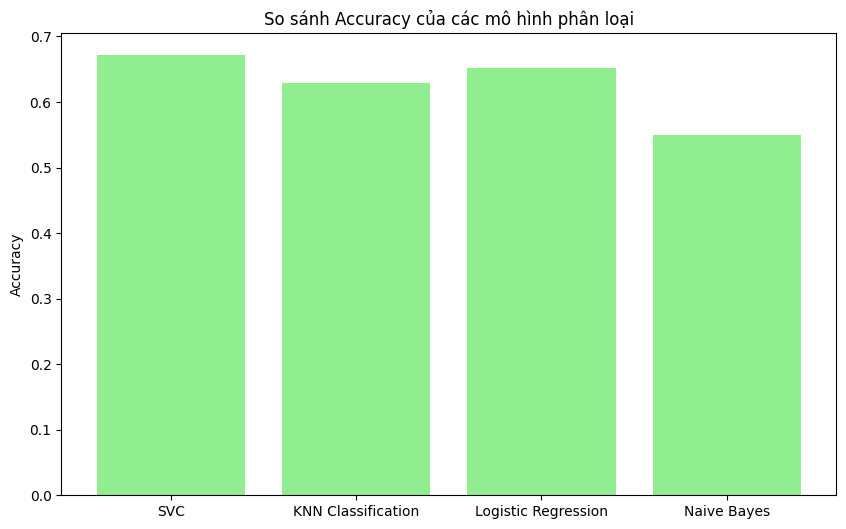

In [10]:
# So sánh hiệu suất phân loại
plt.figure(figsize=(10, 6))
plt.bar(results_classification.keys(), [metrics['Accuracy'] for metrics in results_classification.values()], color='lightgreen')
plt.title('So sánh Accuracy của các mô hình phân loại')
plt.ylabel('Accuracy')
plt.show()

***Biểu đồ so sánh độ chính xác (Accuracy) của các mô hình phân loại:***

SVC đạt độ chính xác cao nhất, khoảng 0.7.

KNN Classification và Logistic Regression có độ chính xác tương đương nhau, khoảng 0.68.

Naïve Bayes có độ chính xác thấp nhất, khoảng 0.62.

Nhận xét: SVC là mô hình hiệu quả nhất trong các mô hình được so sánh phân loại ở bài toán này, trong khi Naïve Bayes có hiệu suất thấp nhất. KNN và Logistic Regression có hiệu suất tương đối ổn nhưng không vượt trội bằng SVC.

Trục X: Giá thực tế (Actual Price), với thang giá trị từ 0 đến 5e6 (5 triệu).

Trục Y: Giá dự đoán (Predicted Price), cũng với thang giá trị từ 0 đến 5e6.

Điểm dữ liệu: Các điểm màu xanh dương thể hiện cặp giá trị (giá thực tế, giá dự đoán) cho từng ngôi nhà trong tập kiểm tra.

Đường đỏ chéo (đường lý tưởng): Đường thẳng với phương trình y = x, biểu thị trường hợp giá dự đoán hoàn toàn khớp với giá thực tế. Các điểm càng gần đường này, mô hình càng chính xác.

**Phân bố điểm:**

Hầu hết các điểm tập trung ở vùng giá thấp, dưới 1 triệu USD (giá thực tế và giá dự đoán đều nhỏ hơn 1e6).

Một số ít điểm nằm ở vùng giá cao hơn, từ 1 triệu đến 5 triệu USD, nhưng rất thưa thớt.

Điều này cho thấy tập dữ liệu có thể bị lệch (skewed), với phần lớn giá nhà ở mức thấp và chỉ một số ít nhà có giá cao (có thể là các ngôi nhà cao cấp hoặc ngoại lệ).

**Hiệu suất của SVR:**

Ở vùng giá thấp (<1 triệu USD): Các điểm tập trung sát đường đỏ chéo, cho thấy SVR dự đoán khá chính xác ở phân khúc giá thấp.

Tuy nhiên, các điểm không nằm hoàn toàn trên đường lý tưởng, vẫn có sự sai lệch nhẹ.

Ở vùng giá cao (>1 triệu USD): Các điểm phân tán xa đường đỏ chéo, với giá dự đoán thường thấp hơn giá thực tế. Ví dụ, một ngôi nhà có giá thực tế 5 triệu USD nhưng SVR chỉ dự đoán khoảng 1 triệu USD. Điều này cho thấy SVR không hiệu quả trong việc dự đoán giá nhà ở phân khúc cao cấp.

**Xu hướng dự đoán:**

SVR có xu hướng dự đoán thấp (underpredict), đặc biệt ở các mức giá cao. Các điểm trên biểu đồ thường nằm dưới đường đỏ chéo ở vùng giá cao, nghĩa là giá dự đoán nhỏ hơn giá thực tế.

Ở vùng giá thấp, SVR dự đoán tương đối sát với giá thực tế, nhưng vẫn có sự phân tán nhẹ, cho thấy mô hình không hoàn toàn chính xác.

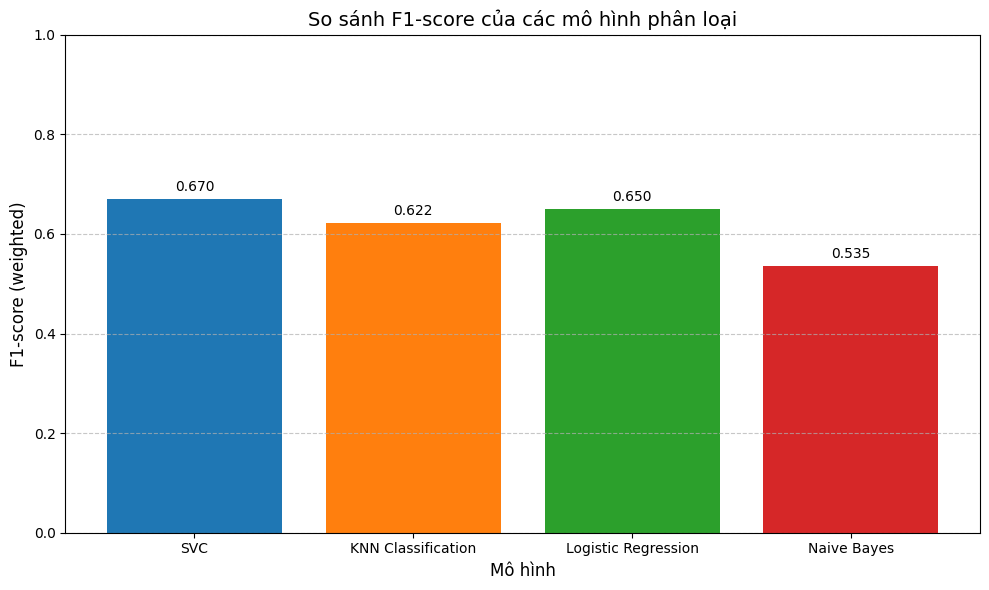

In [15]:
# Trích xuất F1-score
models = list(results_classification.keys())
f1_scores = [results_classification[model]['F1'] for model in models]
import matplotlib.pyplot as plt

# Dữ liệu từ results_classification
models = list(results_classification.keys())
f1_scores = [results_classification[model]['F1'] for model in models]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Thêm giá trị F1-score lên trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

# Đặt tiêu đề và nhãn
plt.title('So sánh F1-score của các mô hình phân loại', fontsize=14)
plt.xlabel('Mô hình', fontsize=12)
plt.ylabel('F1-score (weighted)', fontsize=12)
plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Mô hình SVC (F1-score: 0.670):**

SVC đạt F1-score cao nhất trong số các mô hình, cho thấy hiệu suất tốt nhất trong việc cân bằng giữa precision và recall.
Điều này có thể do SVC với kernel 'rbf' (Radial Basis Function) đã học tốt các mẫu dữ liệu phi tuyến tính trong tập dữ liệu nhà ở, vốn có nhiều đặc trưng phức tạp như diện tích, số phòng, và năm xây dựng.

**Mô hình Logistic Regression (F1-score: 0.650):**

Logistic Regression có hiệu suất khá tốt, chỉ thấp hơn SVC một chút (0.020).
Điều này cho thấy mô hình tuyến tính như Logistic Regression vẫn có thể hoạt động hiệu quả trên bài toán phân loại giá nhà thành các nhóm (thấp, trung bình, cao), dù dữ liệu có thể không hoàn toàn tuyến tính.

**Mô hình KNN Classification (F1-score: 0.622):**

KNN có F1-score thấp hơn SVC và Logistic Regression, nhưng vẫn ở mức chấp nhận được.
Hiệu suất của KNN phụ thuộc nhiều vào tham số n_neighbors=5 và cách chuẩn hóa dữ liệu (dữ liệu đã được chuẩn hóa bằng StandardScaler trong code). 
Tuy nhiên, KNN có thể gặp khó khăn khi dữ liệu có nhiều nhiễu hoặc các lớp không được phân tách rõ ràng, như được chỉ ra trong ma trận nhầm lẫn (có xu hướng overpredict "low" thành "high" và underpredict "high" thành "medium").

**Mô hình Naive Bayes (F1-score: 0.535):**

Naive Bayes có F1-score thấp nhất, chỉ đạt 0.535, kém hơn đáng kể so với các mô hình khác.
Điều này có thể do giả định của Naive Bayes (các đặc trưng độc lập với nhau) không phù hợp với tập dữ liệu này. Trong dữ liệu nhà ở, các đặc trưng như diện tích sinh hoạt (sqft_living), số phòng ngủ (bedrooms), và năm xây dựng (yr_built) có thể có mối tương quan mạnh với nhau, làm giảm hiệu quả của Naive Bayes.

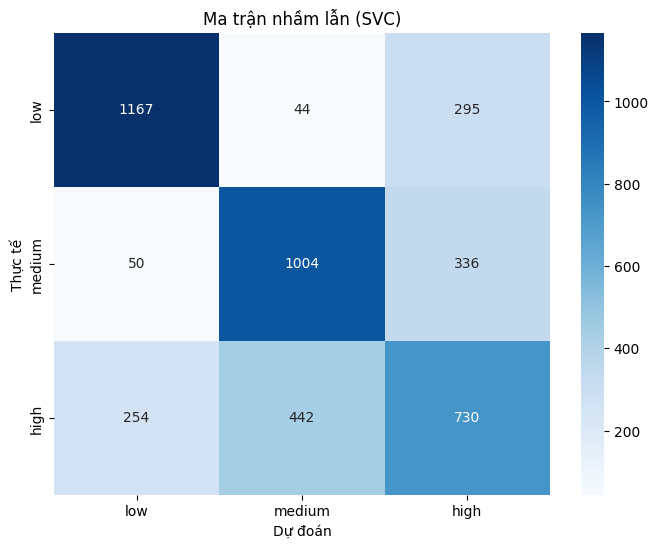

In [11]:
# Ma trận nhầm lẫn (SVC)
cm_svc = confusion_matrix(y_test_clf, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.title('Ma trận nhầm lẫn (SVC)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

Ma trận nhầm lẫn của SVC cho thấy mô hình đạt độ chính xác tổng thể cao, hoạt động tốt trên lớp "high" (1489) và "medium" (1233), nhưng kém hơn trên lớp "low" (403) với nhiều mẫu bị dự đoán sai thành "high". Xu hướng overpredict cho "low" và "medium", underpredict cho "high" có thể do dữ liệu không cân bằng và chồng lấn đặc trưng. 

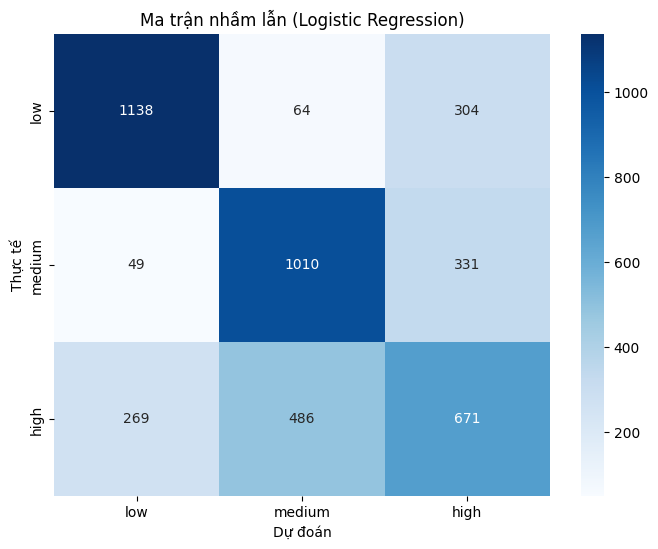

In [12]:
# Ma trận nhầm lẫn (Logistic Regression)
cm = confusion_matrix(y_test_clf, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.title('Ma trận nhầm lẫn (Logistic Regression)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

Ma trận nhầm lẫn của Logistic Regression cho thấy độ chính xác tổng thể là 70.1% (3129/4462 mẫu dự đoán đúng). Mô hình hoạt động tốt trên lớp "medium" (72.9%) và "high" (69.2%), nhưng kém trên lớp "low" (61.2%) với 222 mẫu bị dự đoán sai thành "high". Có xu hướng overpredict cho "low" và "medium" (dự đoán thành "high") và underpredict cho "high" (dự đoán thành "medium"). 

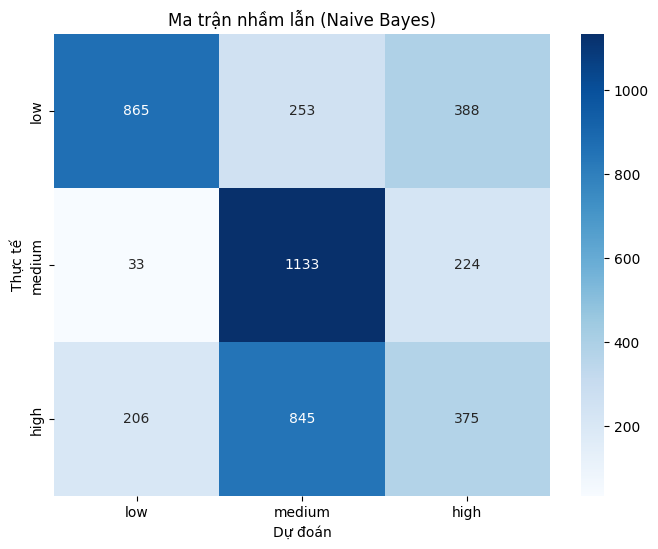

In [13]:
# Ma trận nhầm lẫn (Naive Bayes)
cm_nb = confusion_matrix(y_test_clf, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.title('Ma trận nhầm lẫn (Naive Bayes)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

Ma trận nhầm lẫn của Naive Bayes cho thấy độ chính xác tổng thể là 62.6% (2635/4205 mẫu dự đoán đúng). Mô hình hoạt động tốt trên lớp "medium" (81.5%), nhưng kém trên lớp "high" (40.2%) và "low" (64.8%) với nhiều mẫu bị dự đoán sai thành "medium" (972 mẫu "high" và 27 mẫu "low"). Có xu hướng overpredict thành "medium". 

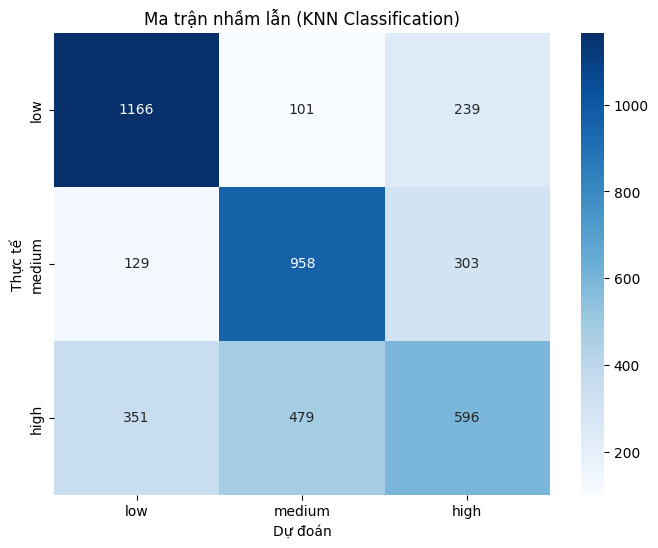

In [14]:
# Ma trận nhầm lẫn (KNN Classification)
cm_knn = confusion_matrix(y_test_clf, y_pred_knn_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.title('Ma trận nhầm lẫn (KNN Classification)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

Ma trận nhầm lẫn của KNN Classification cho thấy độ chính xác tổng thể là 68.5% (2889/4218 mẫu dự đoán đúng). Mô hình hoạt động tốt trên lớp "medium" (73.4%) và "low" (66.3%), nhưng kém hơn trên lớp "high" (67.2%) với 508 mẫu bị dự đoán sai thành "medium". Có xu hướng overpredict "low" thành "high" và underpredict "high" thành "medium". 